## Step 1 - Argo Data

In [98]:
# load libraries
import numpy as np
import pyxpcm
from pyxpcm.models import pcm

import xarray as xr

from argopy import DataFetcher as ArgoDataFetcher

import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

import gsw 

In [2]:
def get_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_in,time_f):
    
    """Function to get argo data for a given lat,lon box (using Argopy), 
       and return a 2D array collection of vertical profile for the given region
    
    Parameters
    ----------
    llon : int
        left longitude
    rlon : int
        right longtidue
    ulat : int
        upper latitude
    llat : int
        lower latitude
    time_in : str/datetime object
        the start time of desired range, formatted Y-m-d
    time_f : str/datetime object
        the end time of desired range, formatted Y-m-d
    
    
    Returns
    ---------
    xarray
        The result is a xarray of the vertical profile for the given range and region.
        
    
    """

    ds_points = ArgoDataFetcher(src='erddap').region([llon,rlon, llat,ulat, depthmin, depthmax,time_in,time_f]).to_xarray()
    ds_profiles = ds_points.argo.point2profile()
    return ds_profiles

In [2]:
def spliced_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_start,time_end):
    """Function that gets the argo data for given latitude and longitude bounding box
       (using Argopy), and given start and end time range to return a 2D array collection of vertical
       profile for the given region and time frame
    
    Parameters
    ----------
    llon : int
        left longitude
    rlon : int
        right longtidue
    ulat : int
        upper latitude
    llat : int
        lower latitude
    time_in : str/datetime object
        the start time of desired range, formatted Y-m-d
    time_f : str/datetime object
        the end time of desired range, formatted Y-m-d
    
    
    Returns
    ---------
    xarray
        The result is a xarray of the vertical profile for the given range and region.
        
    
    """

    
    #step
    max_dt = timedelta(days = 10)
    
    if isinstance(time_start, str):
        time_start = datetime.strptime(time_start,"%Y-%m-%d")
    if isinstance(time_end, str):
        time_end = datetime.strptime(time_end,"%Y-%m-%d")
        
    if time_end - time_start <= max_dt:
        ds = get_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_start,time_end)
        return ds
    else:
        early_end = time_start+max_dt
        ds = get_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_start,early_end)
        print("Retrived data from " + str(time_start) + " to " + str(early_end) + ", retreived " + str(len(ds.N_PROF)) + " profiles")
        ds2 = spliced_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax, early_end,time_end)
        return xr.concat([ds,ds2],dim='N_PROF')


In [44]:
llon=-90;rlon=0
ulat=70;llat=0 
depthmin=0;depthmax=4000
# January 
time_in='2011-01'
time_f='2011-02'

## (i) Get data

In [45]:
ds = get_argo_region_data(llon,rlon,llat,ulat,depthmin,depthmax,time_in,time_f)
ds

<xarray.Dataset>
Dimensions:          (N_LEVELS: 517, N_PROF: 1290)
Coordinates:
    LONGITUDE        (N_PROF) float64 -35.95 -1.999 -2.629 ... -13.97 -16.71
    LATITUDE         (N_PROF) float64 20.4 0.2 1.544 58.81 ... 10.02 59.53 63.01
  * N_PROF           (N_PROF) int64 787 130 126 758 122 ... 952 1054 279 1094
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 ... 511 512 513 514 515 516
    TIME             (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-...
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 19 94 94 19 94 166 ... 172 89 124 80 188 26
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'A' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 5903276 1901096 1901095 ... 4900676 6900615
    POSITION_QC      (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float32 6.1 10.4 19.8 ... nan nan nan
    PRES_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 2 1 1 2 1 1 1 1 1 2
    PSAL             (N_PROF, N_LEVELS) float32 36.98597 37.00794 ... nan nan
    PSAL_QC          (N_PROF, N_LEVELS) int64 1 1 1 1 ... 99999 99999 99999
    TEMP             (N_PROF, N_LEVELS) float32 25.613 25.637 25.641 ... nan nan
    TEMP_QC          (N_PROF, N_LEVELS) int64 1 1 1 1 ... 99999 99999 99999
    TIME_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-90.00/0.00; y=0.00/70.00; z=0.0/4000.0; t=2...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [46]:
ds.PRES

<xarray.DataArray 'PRES' (N_PROF: 1290, N_LEVELS: 517)>
array([[ 6.1, 10.4, 19.8, ...,  nan,  nan,  nan],
       [16. , 26. , 36. , ...,  nan,  nan,  nan],
       [16. , 26. , 36. , ...,  nan,  nan,  nan],
       ...,
       [ 7. ,  9.4, 16. , ...,  nan,  nan,  nan],
       [ 4.1,  9.3, 18.8, ...,  nan,  nan,  nan],
       [ 4.3,  9.2, 14.4, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
    LONGITUDE  (N_PROF) float64 -35.95 -1.999 -2.629 ... -20.71 -13.97 -16.71
    LATITUDE   (N_PROF) float64 20.4 0.2 1.544 58.81 ... 30.94 10.02 59.53 63.01
  * N_PROF     (N_PROF) int64 787 130 126 758 122 890 ... 1006 952 1054 279 1094
  * N_LEVELS   (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 510 511 512 513 514 515 516
    TIME       (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-31T23:...
Attributes:
    casted:   1

## Plot

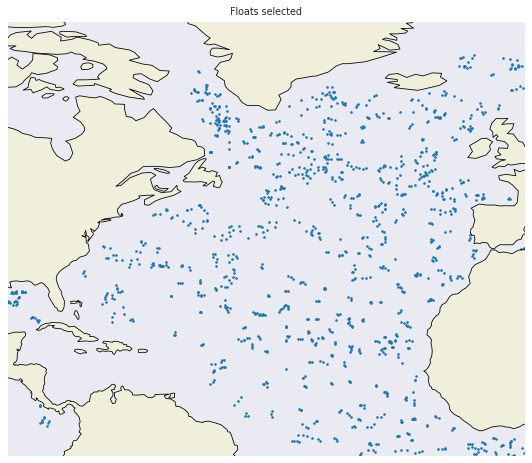

In [47]:
plt.figure(figsize=(15,8))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree()
                 #Mercator()
                 )
ax.set_extent([llon,rlon,llat,ulat])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3)

plt.title('Floats selected')
plt.show()

## (ii) Check QC

According to Argo manual: 
- QC flag values of 1, 2, 5, or 8 are GOOD data
- QC flag values of 9 (missing) are NOT USED in the computation
- All other QC flag values are BAD data 

Page 57 in http://www.odip.org/documents/odip/downloads/20/argo-dm-user-manual.pdf

In [48]:
goodflags=[1,2,5,8]
badflags=[3,4,6,7,9]
QC=['POSITION_QC','PRES_QC','TEMP_QC','PSAL_QC','TIME_QC']
for q in QC:
    data=np.array(ds[q])
    for f in badflags:
        if np.any(data)==f: 
            print('Bad data in '+str(q)+' QC flag: '+str(f))

## (iii) Delayed X Real time Data

DATA_MODE(PROF_N):

R : real time data

D : delayed mode data

A : real time data with adjusted values

In [49]:
ds.DATA_MODE

<xarray.DataArray 'DATA_MODE' (N_PROF: 1290)>
array(['D', 'D', 'D', ..., 'D', 'A', 'D'], dtype='<U1')
Coordinates:
    LONGITUDE  (N_PROF) float64 -35.95 -1.999 -2.629 ... -20.71 -13.97 -16.71
    LATITUDE   (N_PROF) float64 20.4 0.2 1.544 58.81 ... 30.94 10.02 59.53 63.01
  * N_PROF     (N_PROF) int64 787 130 126 758 122 890 ... 1006 952 1054 279 1094
    TIME       (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-31T23:...
Attributes:
    casted:   1

In [67]:
ds2=ds.where(ds.DATA_MODE=='D',drop=True)
print('We selected '+str(len(ds2.N_PROF))+' from '+str(len(ds.N_PROF)))


We selected 1144 from 1290


In [68]:
ds2

<xarray.Dataset>
Dimensions:          (N_LEVELS: 517, N_PROF: 1144)
Coordinates:
    LONGITUDE        (N_PROF) float64 -35.95 -1.999 -2.629 ... -20.71 -16.71
    LATITUDE         (N_PROF) float64 20.4 0.2 1.544 58.81 ... 30.94 10.02 63.01
  * N_PROF           (N_PROF) int64 787 130 126 758 122 ... 1006 952 1054 1094
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 ... 511 512 513 514 515 516
    TIME             (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-...
Data variables:
    CYCLE_NUMBER     (N_PROF) float64 19.0 94.0 94.0 19.0 ... 124.0 80.0 26.0
    DATA_MODE        (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) float64 5.903e+06 1.901e+06 ... 6.901e+06
    POSITION_QC      (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    PRES             (N_PROF, N_LEVELS) float32 6.1 10.4 19.8 ... nan nan nan
    PRES_QC          (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 2.0
    PSAL             (N_PROF, N_LEVELS) float32 36.98597 37.00794 ... nan nan
    PSAL_QC          (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... 1e+05 1e+05
    TEMP             (N_PROF, N_LEVELS) float32 25.613 25.637 25.641 ... nan nan
    TEMP_QC          (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... 1e+05 1e+05
    TIME_QC          (N_PROF) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-90.00/0.00; y=0.00/70.00; z=0.0/4000.0; t=2...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

## (iv) Vertical Interpolation

' We finally interpolated the data on a regular vertical grid with a 5 m resolution (the original resolution ranges from less than 10 m at the surface to 200 m at the bottom of the profile)' - maze et al. 2017

In [128]:
z=np.arange(0.,450,5.)
ds_interp = ds2.argo.interp_std_levels(z)
print(ds_interp)

<xarray.Dataset>
Dimensions:            (N_PROF: 1126, PRES_INTERPOLATED: 90)
Coordinates:
    LONGITUDE          (N_PROF) float64 -35.95 -1.999 -2.629 ... -20.71 -16.71
    LATITUDE           (N_PROF) float64 20.4 0.2 1.544 ... 30.94 10.02 63.01
  * N_PROF             (N_PROF) int64 787 130 126 758 122 ... 1006 952 1054 1094
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) float64 0.0 5.0 10.0 ... 440.0 445.0
    TIME               (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-0...
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 19.0 94.0 94.0 19.0 ... 124.0 80.0 26.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 5.903e+06 1.901e+06 ... 6.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6.1 6.1 ... 445.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.98597 ... 35.25943
    TEMP               (N

So, when we interpolate, the number of profiles decreases a lot, because only the profiles that have data in the interval we asked is kept!

In [129]:
print('The number of profiles changed from  '+str(len(ds2.N_PROF))+ ' to '+str(len(ds_interp.N_PROF)))


The number of profiles changed from  1144 to 1126


In [130]:
ds3=ds_interp


## (v) Pressure to Depth

In [131]:
p=np.array(ds3.PRES)
lat=np.array(ds3.LATITUDE)
z=np.ones_like(p)
nprof=np.array(ds3.N_PROF)
#z=gsw.z_from_p(p,lat)
for i in np.arange(0,len(nprof)):
    z[i,:]=gsw.z_from_p(p[i,:], lat[i])


In [132]:
p_interp=np.array(ds3.PRES_INTERPOLATED)
z_interp=gsw.z_from_p(p_interp, 35) # choosing a mid latitude of the basin

## (vi) Make a clean dataset 

We could use ds.drop_vars() or ds.drop_dims() also

In [133]:
temp=np.array(ds3.TEMP)
sal=np.array(ds3.PSAL)
depth_var=z
depth=z_interp
lat=np.array(ds3.LATITUDE)
lon=np.array(ds3.LONGITUDE)
time=np.array(ds3.TIME)

In [134]:
da=xr.Dataset(data_vars={'TEMP':(('N_PROF','DEPTH'),temp),
                        'PSAL':(('N_PROF','DEPTH'),sal),
                        'TIME':(('N_PROF'),time),
                         'LATITUDE':(('N_PROF'),lat),
                         'LONGITUDE':(('N_PROF'),lon),
                         'DEPTH_PROF':(('N_PROF','DEPTH'),depth_var)
                        },
                         coords={'N_PROF':nprof,
                                'DEPTH':depth})

In [135]:
da

<xarray.Dataset>
Dimensions:     (DEPTH: 90, N_PROF: 1126)
Coordinates:
  * N_PROF      (N_PROF) int64 787 130 126 758 122 ... 912 1006 952 1054 1094
  * DEPTH       (DEPTH) float64 -0.0 -4.964 -9.928 ... -431.4 -436.4 -441.3
Data variables:
    TEMP        (N_PROF, DEPTH) float32 25.613 25.613 ... 8.358898 8.356802
    PSAL        (N_PROF, DEPTH) float32 36.98597 36.98597 ... 35.259926 35.25943
    TIME        (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-31T23...
    LATITUDE    (N_PROF) float64 20.4 0.2 1.544 58.81 ... 60.5 30.94 10.02 63.01
    LONGITUDE   (N_PROF) float64 -35.95 -1.999 -2.629 ... -11.92 -20.71 -16.71
    DEPTH_PROF  (N_PROF, DEPTH) float32 -6.062518 -6.062518 ... -440.22827

## Make model

In [138]:
z = np.arange(0.,-450,-10.) # depth array
pcm_features = {'temperature': z, 'salinity':z} #features that vary in function of depth
m = pcm(K=8, features=pcm_features) # create the 'basic' model
m

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

## Fit model

In [139]:
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='DEPTH'
m.fit(da, features=features_in_ds, dim=features_zdim)
m

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 57.502604

In [140]:
da['TEMP'].attrs['feature_name'] = 'temperature'
da['PSAL'].attrs['feature_name'] = 'salinity'
da['DEPTH'].attrs['axis'] = 'Z'
m.fit(da)

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 58.010757

## Classify the data

In [141]:
da

<xarray.Dataset>
Dimensions:     (DEPTH: 90, N_PROF: 1126)
Coordinates:
  * N_PROF      (N_PROF) int64 787 130 126 758 122 ... 912 1006 952 1054 1094
  * DEPTH       (DEPTH) float64 -0.0 -4.964 -9.928 ... -431.4 -436.4 -441.3
Data variables:
    TEMP        (N_PROF, DEPTH) float32 25.613 25.613 ... 8.358898 8.356802
    PSAL        (N_PROF, DEPTH) float32 36.98597 36.98597 ... 35.259926 35.25943
    TIME        (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-31T23...
    LATITUDE    (N_PROF) float64 20.4 0.2 1.544 58.81 ... 60.5 30.94 10.02 63.01
    LONGITUDE   (N_PROF) float64 -35.95 -1.999 -2.629 ... -11.92 -20.71 -16.71
    DEPTH_PROF  (N_PROF, DEPTH) float32 -6.062518 -6.062518 ... -440.22827

In [142]:
m.predict(da, features=features_in_ds, dim=features_zdim,inplace=True)
da

<xarray.Dataset>
Dimensions:     (DEPTH: 90, N_PROF: 1126)
Coordinates:
  * N_PROF      (N_PROF) int64 787 130 126 758 122 ... 912 1006 952 1054 1094
  * DEPTH       (DEPTH) float64 -0.0 -4.964 -9.928 ... -431.4 -436.4 -441.3
Data variables:
    TEMP        (N_PROF, DEPTH) float32 25.613 25.613 ... 8.358898 8.356802
    PSAL        (N_PROF, DEPTH) float32 36.98597 36.98597 ... 35.259926 35.25943
    TIME        (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-31T23...
    LATITUDE    (N_PROF) float64 20.4 0.2 1.544 58.81 ... 60.5 30.94 10.02 63.01
    LONGITUDE   (N_PROF) float64 -35.95 -1.999 -2.629 ... -11.92 -20.71 -16.71
    DEPTH_PROF  (N_PROF, DEPTH) float32 -6.062518 -6.062518 ... -440.22827
    PCM_LABELS  (N_PROF) int64 7 5 5 0 5 0 1 5 5 2 3 7 ... 5 1 0 0 3 0 1 0 1 5 0

In [143]:
m.predict_proba(da, features=features_in_ds, inplace=True)
da

<xarray.Dataset>
Dimensions:     (DEPTH: 90, N_PROF: 1126, pcm_class: 8)
Coordinates:
  * N_PROF      (N_PROF) int64 787 130 126 758 122 ... 912 1006 952 1054 1094
  * DEPTH       (DEPTH) float64 -0.0 -4.964 -9.928 ... -431.4 -436.4 -441.3
Dimensions without coordinates: pcm_class
Data variables:
    TEMP        (N_PROF, DEPTH) float32 25.613 25.613 ... 8.358898 8.356802
    PSAL        (N_PROF, DEPTH) float32 36.98597 36.98597 ... 35.259926 35.25943
    TIME        (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-31T23...
    LATITUDE    (N_PROF) float64 20.4 0.2 1.544 58.81 ... 60.5 30.94 10.02 63.01
    LONGITUDE   (N_PROF) float64 -35.95 -1.999 -2.629 ... -11.92 -20.71 -16.71
    DEPTH_PROF  (N_PROF, DEPTH) float32 -6.062518 -6.062518 ... -440.22827
    PCM_LABELS  (N_PROF) int64 7 5 5 0 5 0 1 5 5 2 3 7 ... 5 1 0 0 3 0 1 0 1 5 0
    PCM_POST    (pcm_class, N_PROF) float64 0.0 0.0 0.0 ... 0.0 6.029e-105

In [144]:
for vname in ['TEMP', 'PSAL']:
    da = da.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)
da

<xarray.Dataset>
Dimensions:     (DEPTH: 90, N_PROF: 1126, pcm_class: 8, quantile: 3)
Coordinates:
  * pcm_class   (pcm_class) int64 0 1 2 3 4 5 6 7
  * N_PROF      (N_PROF) int64 787 130 126 758 122 ... 912 1006 952 1054 1094
  * DEPTH       (DEPTH) float64 -0.0 -4.964 -9.928 ... -431.4 -436.4 -441.3
  * quantile    (quantile) float64 0.05 0.5 0.95
Data variables:
    TEMP        (N_PROF, DEPTH) float32 25.613 25.613 ... 8.358898 8.356802
    PSAL        (N_PROF, DEPTH) float32 36.98597 36.98597 ... 35.259926 35.25943
    TIME        (N_PROF) datetime64[ns] 2011-01-01T03:24:35 ... 2011-01-31T23...
    LATITUDE    (N_PROF) float64 20.4 0.2 1.544 58.81 ... 60.5 30.94 10.02 63.01
    LONGITUDE   (N_PROF) float64 -35.95 -1.999 -2.629 ... -11.92 -20.71 -16.71
    DEPTH_PROF  (N_PROF, DEPTH) float32 -6.062518 -6.062518 ... -440.22827
    PCM_LABELS  (N_PROF) int64 7 5 5 0 5 0 1 5 5 2 3 7 ... 5 1 0 0 3 0 1 0 1 5 0
    PCM_POST    (pcm_class, N_PROF) float64 0.0 0.0 0.0 ... 0.0 6.029e-105
    TEMP_Q      (pcm_class, quantile, DEPTH) float64 4.899 4.9 ... 15.38 15.31
    PSAL_Q      (pcm_class, quantile, DEPTH) float64 34.71 34.71 ... 36.09 36.08

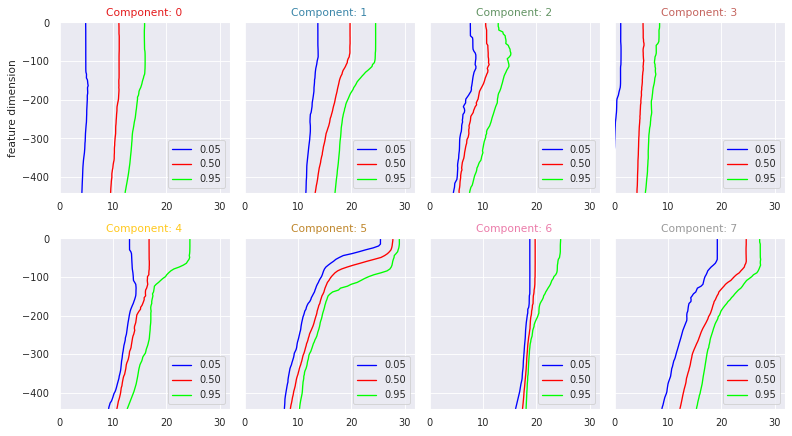

In [145]:
fig, ax = m.plot.quantile(da['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)


/home/jovyan/my-conda-envs/ohw20-proj-pyxpcm/lib/python3.8/site-packages/pyxpcm/plot.py:111: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  colorbar = plt.colorbar(mappable, **kwargs)
/home/jovyan/my-conda-envs/ohw20-proj-pyxpcm/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/jovyan/my-conda-envs/ohw20-proj-pyxpcm/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


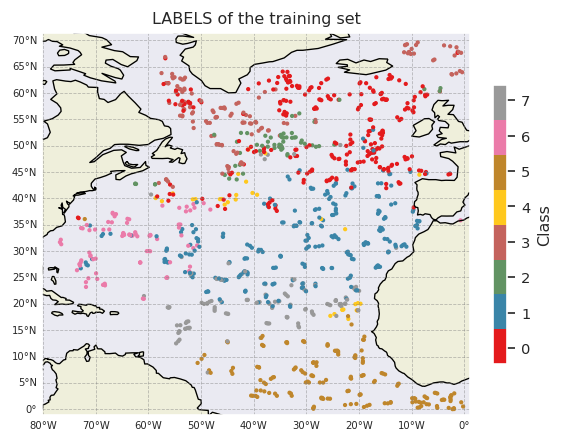

In [146]:
ds=da
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('LABELS of the training set')
plt.show()